In [1]:
import polars as pl

In [2]:
base_path = '/kaggle/s3storage/01_public/humob-challenge-2024/input/'

In [3]:
poi_datacategories = pl.read_csv(base_path + 'POI_datacategories.csv',  has_header=False, new_columns=["poi_category"])
poi_datacategories.head()

poi_category
str
"""Food"""
"""Shopping"""
"""Entertainment"""
"""Japanese resta…"
"""Western restau…"


In [4]:
poi_data_cityA = pl.read_csv(base_path + 'POIdata_cityA.csv')
poi_data_cityA.head()

x,y,category,POI_count
i64,i64,i64,i64
1,1,74,4
1,1,48,4
1,1,79,2
1,1,69,2
1,1,73,1


In [5]:
poi_data_cityB = pl.read_csv(base_path + 'POIdata_cityB.csv')
poi_data_cityC = pl.read_csv(base_path + 'POIdata_cityC.csv')
poi_data_cityD = pl.read_csv(base_path + 'POIdata_cityD.csv')

In [6]:
cityA_df = pl.read_csv(base_path + 'cityA_groundtruthdata.csv.gz')
cityB_df = pl.read_csv(base_path + 'cityB_challengedata.csv.gz')
cityC_df = pl.read_csv(base_path + 'cityC_challengedata.csv.gz')
cityD_df = pl.read_csv(base_path + 'cityD_challengedata.csv.gz')

In [7]:
cityA_df.head()

uid,d,t,x,y
i64,i64,i64,i64,i64
0,0,1,79,86
0,0,2,79,86
0,0,8,77,86
0,0,9,77,86
0,0,19,81,89


In [17]:
cityD_df.filter(pl.col("x") == 999)

uid,d,t,x,y
i64,i64,i64,i64,i64
3000,60,13,999,999
3000,60,14,999,999
3000,60,15,999,999
3000,60,16,999,999
3000,60,17,999,999
…,…,…,…,…
5999,74,37,999,999
5999,74,38,999,999
5999,74,39,999,999


In [50]:
cityA_df.describe()

statistic,uid,d,t,x,y
str,f64,f64,f64,f64,f64
"""count""",1.11535175e8,1.11535175e8,1.11535175e8,1.11535175e8,1.11535175e8
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",49174.605857,37.408682,25.965285,122.907866,85.650364
"""std""",28811.828254,21.681454,11.167328,42.099119,42.819129
"""min""",0.0,0.0,0.0,1.0,1.0
"""25%""",23932.0,19.0,18.0,95.0,58.0
"""50%""",49258.0,38.0,26.0,127.0,84.0
"""75%""",73929.0,57.0,35.0,155.0,111.0
"""max""",99999.0,74.0,47.0,200.0,200.0


In [51]:
cityB_df.describe()

statistic,uid,d,t,x,y
str,f64,f64,f64,f64,f64
"""count""",2.4375898e7,2.4375898e7,2.4375898e7,2.4375898e7,2.4375898e7
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",11832.904077,37.067401,25.917429,96.593006,120.529628
"""std""",7110.574985,21.552692,11.172912,129.704245,128.54582
"""min""",0.0,0.0,0.0,1.0,1.0
"""25%""",5680.0,18.0,18.0,68.0,84.0
"""50%""",11530.0,37.0,26.0,78.0,98.0
"""75%""",17809.0,56.0,35.0,90.0,126.0
"""max""",24999.0,74.0,47.0,999.0,999.0


In [52]:
cityC_df.describe()

statistic,uid,d,t,x,y
str,f64,f64,f64,f64,f64
"""count""",1.8456528e7,1.8456528e7,1.8456528e7,1.8456528e7,1.8456528e7
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",9496.01815,36.928308,26.050948,52.33526,172.679332
"""std""",5718.955907,21.564766,11.129113,150.206589,133.30389
"""min""",0.0,0.0,0.0,1.0,1.0
"""25%""",4509.0,18.0,18.0,21.0,146.0
"""50%""",9279.0,37.0,26.0,27.0,155.0
"""75%""",14340.0,56.0,35.0,36.0,169.0
"""max""",19999.0,74.0,47.0,999.0,999.0


In [54]:
cityD_df.describe()

statistic,uid,d,t,x,y
str,f64,f64,f64,f64,f64
"""count""",8.418135e6,8.418135e6,8.418135e6,8.418135e6,8.418135e6
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",2921.240095,37.032223,25.404322,206.276453,173.875274
"""std""",1716.521117,21.683317,11.804886,264.853685,274.677443
"""min""",0.0,0.0,0.0,1.0,1.0
"""25%""",1431.0,18.0,17.0,96.0,55.0
"""50%""",2894.0,37.0,26.0,119.0,97.0
"""75%""",4398.0,56.0,35.0,181.0,117.0
"""max""",5999.0,74.0,47.0,999.0,999.0


In [41]:
cityA_count = cityA_df.group_by('d').len().sort('d')
cityB_count = cityB_df.group_by('d').len().sort('d')
cityC_count = cityC_df.group_by('d').len().sort('d')
cityD_count = cityD_df.group_by('d').len().sort('d')
cityA_count.head()

d,len
i64,u32
0,1252461
1,1288870
2,1511471
3,1514080
4,1547785


In [42]:
import matplotlib.pyplot as plt

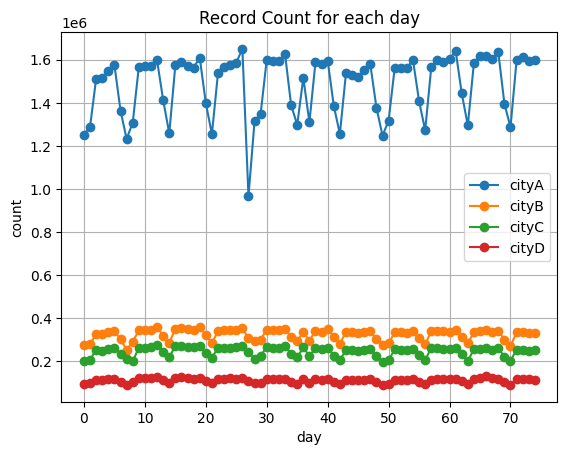

In [55]:
dfs ={"cityA":cityA_count,"cityB":cityB_count, "cityC":cityC_count, "cityD":cityD_count}
for name, df in dfs.items():
    x = df["d"].to_list()
    y = df["len"].to_list()
    plt.plot(x, y, marker='o', label=name)
plt.xlabel("day")
plt.ylabel("count")
plt.title("Record Count for each day")
plt.grid(True)  # グリッド線を表示
plt.legend()